# PREPOZNAVA ŠTEVILA PIK NA KOCKI - POROČILO

PRIPRAVIL: Blaž Glogovčan

## Testiranje brez augmentacije

### Lastnosti podatkovne zbirke

* 6 kategorij
    * 1 pika (179 slik)
    * 2 piki (181 slik)
    * 3 pike (188 slik)
    * 4 pike (185 slik)
    * 5 pik (181 slik)
    * 6 pik (184 slik)
* **Skupaj: 1098 slik**
    
### Predobdelava

* Vzorci obrezani na okolico kocke
* Pomanjšani na **128 x 128** 
* Vzorci v predobdelavi razdeljeni na razmerje **učni : testni = 60 : 40**


In [1]:
import numpy as np
import cv2
import os
import random
import matplotlib.pyplot as plt
import pickle
from tensorflow.python import keras
from tensorflow.python.keras.callbacks import TensorBoard
from datetime import datetime

DIRECTORY = 'karte'
CATEGORIES = ['ena', 'dva', 'tri', 'stiri', 'pet', 'sest']
IMG_SIZE = 128

data = []

#preparing the images
for category in CATEGORIES:
    folder = os.path.join(DIRECTORY, category)
    label = CATEGORIES.index(category)

    for image in os.listdir(folder):
        image_path = os.path.join(folder, image)
        
        image_array = cv2.imread(image_path)
        image_array = cv2.resize(image_array, (IMG_SIZE, IMG_SIZE))
        #plt.imshow(image_array)
        #break
        data.append([image_array, label])

#shuffling the images
#print(len(data))
random.shuffle(data)

#creating arrays for images and labels
images = []
labels = []
for img, lbl in data:
    images.append(img)
    labels.append(lbl)
images = np.array(images)
labels = np.array(labels)

#scaling
images = images/255

size = round(len(data) * 0.6)
images_train = images[:size]
images_test = images[size:]

labels_train = labels[:size]
labels_test = labels[size:]

### Učni vzorci

(-0.5, 127.5, 127.5, -0.5)

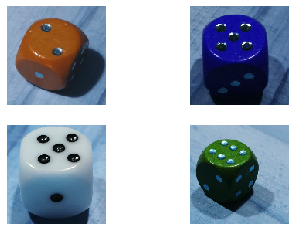

In [2]:
plt.figure()
plt.subplot(221)
plt.imshow(images_train[0])
plt.axis('off')
plt.subplot(222)
plt.imshow(images_train[1])
plt.axis('off')
plt.subplot(223)
plt.imshow(images_train[2])
plt.axis('off')
plt.subplot(224)
plt.imshow(images_train[3])
plt.axis('off')

### Testni vzorci

(-0.5, 127.5, 127.5, -0.5)

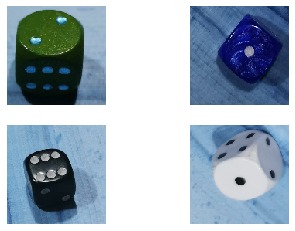

In [3]:
plt.figure()
plt.subplot(221)
plt.imshow(images_test[0])
plt.axis('off')
plt.subplot(222)
plt.imshow(images_test[1])
plt.axis('off')
plt.subplot(223)
plt.imshow(images_test[2])
plt.axis('off')
plt.subplot(224)
plt.imshow(images_test[3])
plt.axis('off')

### Učenje na originalnih podatkih

#### Tensorflow

In [4]:
model = keras.Sequential()
model.add(keras.layers.Convolution2D(24, (11, 11), activation='relu', strides=(4, 4)))
model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2)))

model.add(keras.layers.Convolution2D(64, (5, 5), activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2)))

model.add(keras.layers.Convolution2D(96, (3, 3), activation='relu', padding='same'))
model.add(keras.layers.Convolution2D(96, (3, 3), activation='relu', padding='same'))
model.add(keras.layers.Convolution2D(64, (3, 3), activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, input_shape= images[1:], activation='relu'))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(6, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [5]:
hist = model.fit(images_train, labels_train, epochs=50, validation_data=(images_test, labels_test))

Epoch 1/50
21/21 [==============================] - 2s 104ms/step - loss: 1.7964 - accuracy: 0.1581 - val_loss: 1.7931 - val_accuracy: 0.1754
Epoch 2/50
21/21 [==============================] - 2s 112ms/step - loss: 1.7902 - accuracy: 0.1960 - val_loss: 1.7916 - val_accuracy: 0.1435
Epoch 3/50
21/21 [==============================] - 2s 97ms/step - loss: 1.7743 - accuracy: 0.1976 - val_loss: 1.7815 - val_accuracy: 0.1617
Epoch 4/50
21/21 [==============================] - 2s 97ms/step - loss: 1.7463 - accuracy: 0.2112 - val_loss: 1.7471 - val_accuracy: 0.2073
Epoch 5/50
21/21 [==============================] - 2s 92ms/step - loss: 1.6680 - accuracy: 0.2705 - val_loss: 1.5386 - val_accuracy: 0.2711
Epoch 6/50
21/21 [==============================] - 3s 142ms/step - loss: 1.5485 - accuracy: 0.3267 - val_loss: 1.6031 - val_accuracy: 0.2847
Epoch 7/50
21/21 [==============================] - 2s 99ms/step - loss: 1.5158 - accuracy: 0.3161 - val_loss: 1.4725 - val_accuracy: 0.3349
Epoch 8/50

#### Natančnost učnih vzorcev 

In [6]:
train_loss, train_acc = model.evaluate(images_train, labels_train)
print('Test accuracy: ', train_acc)

21/21 [==============================] - 0s 22ms/step - loss: 1.3946e-04 - accuracy: 1.0000
Test accuracy:  1.0


#### Natančnost testnih vzorcev

In [7]:
test_loss, test_acc = model.evaluate(images_test, labels_test)
print('Test accuracy: ', test_acc)

14/14 [==============================] - 0s 20ms/step - loss: 2.2809 - accuracy: 0.7084
Test accuracy:  0.7084282636642456


Text(0.5, 1.0, 'val_accuracy')

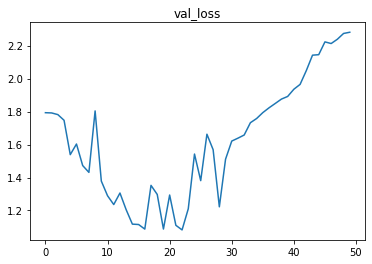

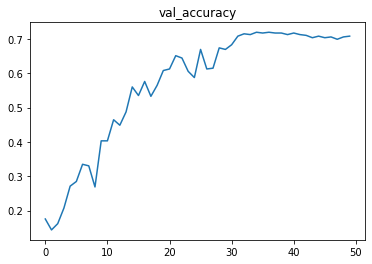

In [8]:
plt.close('all')
plt.figure()
plt.plot(hist.history['val_loss'])
plt.title('val_loss')
plt.figure()
plt.plot(hist.history['val_accuracy'])
plt.title('val_accuracy')

## Augmentacija učnih vzorcev

Vzorec je pred učenjem bil rotiran, zamaknjen in skaliran.

### Parametri
* Rotacija od **0 do 60 stopinj**
* Skaliranje do **0.10*
* Zamik po širini in višini za **do 0.2**
* **Horizontalno zrcaljena**

In [9]:
from keras_preprocessing.image import ImageDataGenerator

In [14]:
datagen = ImageDataGenerator(
    rotation_range=60,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

### Primer slike pred augmentacijo

(-0.5, 127.5, 127.5, -0.5)

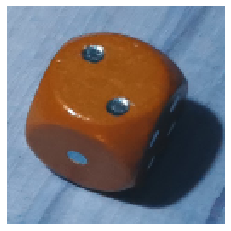

In [15]:
plt.imshow(images_train[0])
plt.axis('off')

### Ista slika po augmentaciji

In [16]:
train_images_data = datagen.flow(images_train, labels_train, shuffle=False)

(-0.5, 127.5, 127.5, -0.5)

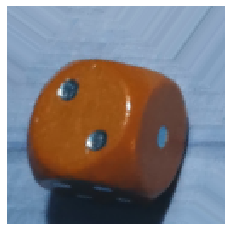

In [17]:
plt.imshow(train_images_data[0][0][0])
plt.axis('off')

### Učenje na augmentiranih podatkih

In [18]:
model = keras.Sequential()
model.add(keras.layers.Convolution2D(24, (11, 11), activation='relu', strides=(4, 4)))
model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2)))

#model.add(keras.layers.Convolution2D(64, (3, 3), activation='relu'))
#model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Convolution2D(64, (5, 5), activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2)))

model.add(keras.layers.Convolution2D(96, (3, 3), activation='relu', padding='same'))
model.add(keras.layers.Convolution2D(96, (3, 3), activation='relu', padding='same'))
model.add(keras.layers.Convolution2D(64, (3, 3), activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, input_shape= images[1:], activation='relu'))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(6, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [19]:
hist = model.fit(train_images_data, epochs=50, validation_data=(images_test, labels_test))

Epoch 1/50
21/21 [==============================] - 6s 303ms/step - loss: 1.7956 - accuracy: 0.1429 - val_loss: 1.7917 - val_accuracy: 0.1321
Epoch 2/50
21/21 [==============================] - 7s 313ms/step - loss: 1.7879 - accuracy: 0.1763 - val_loss: 1.7902 - val_accuracy: 0.1435
Epoch 3/50
21/21 [==============================] - 6s 308ms/step - loss: 1.7845 - accuracy: 0.1793 - val_loss: 1.7933 - val_accuracy: 0.1572
Epoch 4/50
21/21 [==============================] - 7s 323ms/step - loss: 1.7910 - accuracy: 0.1884 - val_loss: 1.7927 - val_accuracy: 0.1982
Epoch 5/50
21/21 [==============================] - 7s 325ms/step - loss: 1.7829 - accuracy: 0.1763 - val_loss: 1.7989 - val_accuracy: 0.1572
Epoch 6/50
21/21 [==============================] - 7s 318ms/step - loss: 1.7733 - accuracy: 0.1824 - val_loss: 1.7640 - val_accuracy: 0.1731
Epoch 7/50
21/21 [==============================] - 7s 334ms/step - loss: 1.7185 - accuracy: 0.2052 - val_loss: 1.7704 - val_accuracy: 0.2278
Epoch 

#### Natančnost učnih vzorcev

In [21]:
train_loss, train_acc = model.evaluate(train_images_data)
print('Test accuracy: ', train_acc)

21/21 [==============================] - 5s 249ms/step - loss: 0.7101 - accuracy: 0.7523
Test accuracy:  0.7522796392440796


#### Natančnost testnih vzorcev

In [20]:
test_loss, test_acc = model.evaluate(images_test, labels_test)
print('Test accuracy: ', test_acc)

14/14 [==============================] - 0s 24ms/step - loss: 0.6676 - accuracy: 0.7677
Test accuracy:  0.76765376329422


Text(0.5, 1.0, 'val_accuracy')

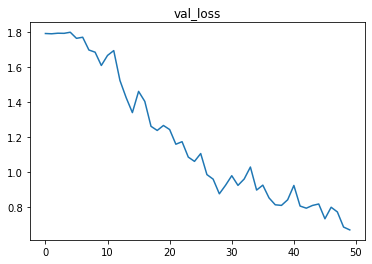

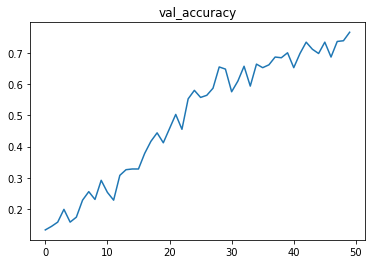

In [22]:
plt.close('all')
plt.figure()
plt.plot(hist.history['val_loss'])
plt.title('val_loss')
plt.figure()
plt.plot(hist.history['val_accuracy'])
plt.title('val_accuracy')

## Zaključek

#### Rezultati učenja brez augmentacije podatkov

Testni rezultati so bili slabši od učnih, ki so imeli natančnost 1.0

#### Rezultati učenja z augmentacijo podatkov

Pričakoval sem slabše rezultate kot pri učenju brez augmentacije, saj so nekatere slike bile obrezane tako, da je bila kocka skoraj na robu slike, po augmentaciji pa se bi znalo zgoditi, da celotna kocka ne bi bila na sliki in se posledično pike ne bi videle.

Rezultati testnih vzorcev so bili za **1%** boljši od učnih

Rezultati učenja **z augmentacijo so bili boljši** za približno **6%**, kar je bilo nad mojimi pričakovanji.